In [2]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('D:/CVR_MINI_PROG/RAVDESS/Actor_01/03-01-08-02-02-01-01.wav')

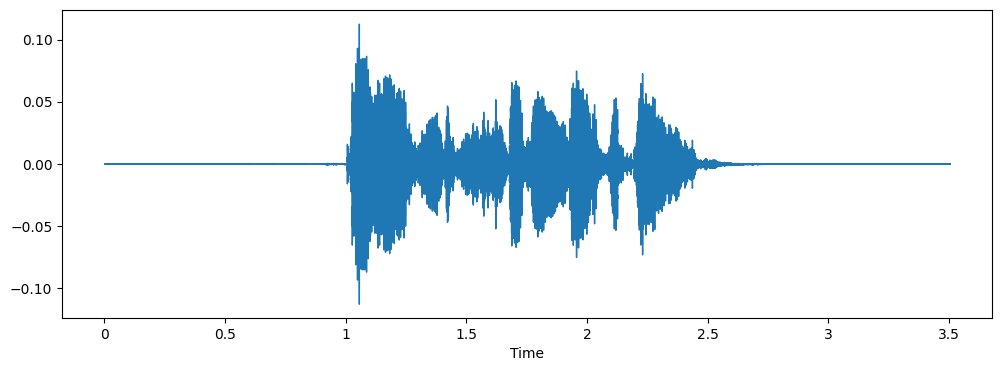

In [15]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()


In [16]:
import time
import os
import numpy as np
import librosa

path = 'D:/CVR_MINI_PROG/RAVDESS'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
    for file in files:
        try:
            # Load librosa array, obtain mfcss, store the file and the mfcc information in a new array
            X, sample_rate = librosa.load(os.path.join(subdir, file), res_type='scipy')

            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            # Convert the label
            file_label = int(file[7:8]) - 1
            arr = (mfccs, file_label)
            lst.append(arr)

        except ValueError as e:
            print(f"Skipping file {file} due to error: {e}")
        except librosa.util.exceptions.ParameterError as e:
            print(f"Librosa error in file {file}: {e}")
        except Exception as e:
            print(f"Skipping file {file} due to an unexpected error: {e}")

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))


C:\Users\anshs\AppData\Local\Temp\ipykernel_9820\361814259.py:15: UserWarning: PySoundFile failed. Trying audioread instead.
  X, sample_rate = librosa.load(os.path.join(subdir, file), res_type='scipy')
c:\Users\anshs\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Skipping file X.joblib due to an unexpected error: 
Skipping file y.joblib due to an unexpected error: 


C:\Users\anshs\AppData\Local\Temp\ipykernel_9820\361814259.py:15: UserWarning: PySoundFile failed. Trying audioread instead.
  X, sample_rate = librosa.load(os.path.join(subdir, file), res_type='scipy')
c:\Users\anshs\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Skipping file X.joblib due to an unexpected error: 
Skipping file y.joblib due to an unexpected error: 
--- Data loaded. Loading time: 85.85728621482849 seconds ---


In [17]:
# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)

In [18]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)


X.shape, y.shape

((2880, 40), (2880,))

In [19]:
# Saving joblib files to not load them again with the loop above

import joblib

X_name = 'X.joblib'
y_name = 'y.joblib'
save_dir = 'D:/CVR_MINI_PROG/RAVDESS'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))

In [3]:
# Loading saved models
import joblib
X = joblib.load('D:/CVR_MINI_PROG/RAVDESS/X.joblib')
y = joblib.load('D:/CVR_MINI_PROG/RAVDESS/y.joblib')

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
dtree = DecisionTreeClassifier()

In [5]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
predictions = dtree.predict(X_test)

In [7]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72        73
           1       0.79      0.87      0.83       124
           2       0.80      0.78      0.79       135
           3       0.71      0.85      0.78       109
           4       0.78      0.84      0.81       112
           5       0.82      0.82      0.82       133
           6       0.83      0.74      0.79       133
           7       0.89      0.83      0.86       132

    accuracy                           0.80       951
   macro avg       0.81      0.80      0.80       951
weighted avg       0.81      0.80      0.80       951



# Neural network

In [5]:
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [5]:
x_traincnn.shape, x_testcnn.shape

((1929, 40, 1), (951, 40, 1))

In [26]:
!pip install keras==2.9.0 tensorflow==2.9.0


ERROR: Could not find a version that satisfies the requirement tensorflow==2.9.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.9.0


In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Activation, Dropout, MaxPooling1D, Flatten, Input
from keras.optimizers import RMSprop
model = Sequential()

# Define the input shape directly in the first layer
model.add(Conv1D(64, 5, padding='same', input_shape=(40, 1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=4))

model.add(Conv1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=4))

model.add(Conv1D(256, 5, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))

# Compile and train as before
opt = RMSprop(learning_rate=0.00005, rho=0.9, epsilon=1e-07)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Now it will show up in model.summary() correctly
model.summary()


c:\Users\anshs\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 40, 64)         │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 10, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 2, 256)         │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         4,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,672 (819.03 KB)

 Trainable params: 209,672 (819.03 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
cnnhistory = model.fit(
    x_traincnn, y_train,
    batch_size=16,
    epochs=500,
    validation_data=(x_testcnn, y_test)
)

# Save the model
model.save('speech_model2.h5')
print("SER Model Saved Successfully!")

Epoch 1/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1398 - loss: 6.3636 - val_accuracy: 0.1157 - val_loss: 2.5384
Epoch 2/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1182 - loss: 4.0897 - val_accuracy: 0.1851 - val_loss: 2.0102
Epoch 3/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1531 - loss: 3.2773 - val_accuracy: 0.1430 - val_loss: 2.0632
Epoch 4/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1639 - loss: 2.7713 - val_accuracy: 0.2250 - val_loss: 2.0049
Epoch 5/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1909 - loss: 2.5320 - val_accuracy: 0.2587 - val_loss: 1.9362
Epoch 6/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1926 - loss: 2.3532 - val_accuracy: 0.2419 - val_loss: 1.9243
Epoch 7/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2000 - loss: 2.2128 - val_accuracy: 0.2576 - val_loss: 1.9098
Epoch 8/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2162 - loss: 2.1444 - val_accu

SER Model Saved Successfully!


In [6]:
import pickle

# Save the entire model using Pickle
with open("speech_model_pickle.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as a Pickle file: model_pickle.pkl")

Model saved as a Pickle file: model_pickle.pkl


In [9]:
cnnhistory2 = model.fit(
    x_traincnn, y_train,
    batch_size=16,
    epochs=500,
    validation_data=(x_testcnn, y_test)
)



Epoch 1/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9647 - loss: 0.1206 - val_accuracy: 0.8875 - val_loss: 0.5140
Epoch 2/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9555 - loss: 0.1426 - val_accuracy: 0.8875 - val_loss: 0.5387
Epoch 3/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9620 - loss: 0.1264 - val_accuracy: 0.8791 - val_loss: 0.5596
Epoch 4/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9601 - loss: 0.1370 - val_accuracy: 0.8791 - val_loss: 0.5156
Epoch 5/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9517 - loss: 0.1470 - val_accuracy: 0.8875 - val_loss: 0.5526
Epoch 6/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9558 - loss: 0.1235 - val_accuracy: 0.8822 - val_loss: 0.5292
Epoch 7/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9632 - loss: 0.1237 - val_accuracy: 0.8854 - val_loss: 0.5156
Epoch 8/500
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9557 - loss: 0.1267 - val_accu

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

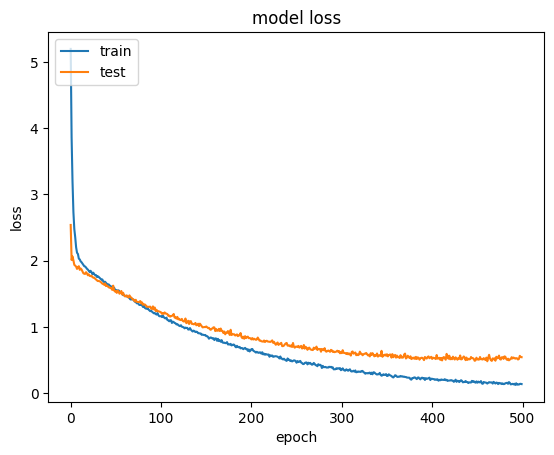

In [11]:
import matplotlib.pyplot as plt
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

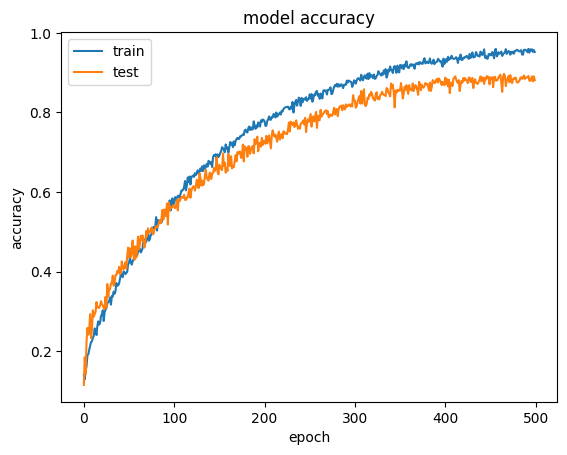

In [12]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# Get the predicted probabilities for each class
predictions_prob = model.predict(x_testcnn)

# Convert the probabilities to class predictions (getting the index of the max probability)
predictions = np.argmax(predictions_prob, axis=1)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [79]:
predictions

array([6, 2, 5, 5, 2, 7, 6, 4, 6, 1, 2, 3, 1, 3, 5, 1, 2, 7, 4, 7, 7, 3,
       1, 4, 5, 2, 3, 6, 2, 7, 6, 1, 4, 6, 4, 2, 6, 1, 7, 1, 4, 4, 0, 4,
       4, 6, 0, 7, 7, 2, 6, 3, 3, 2, 3, 0, 3, 0, 2, 7, 7, 7, 6, 6, 3, 5,
       1, 5, 7, 1, 1, 2, 4, 4, 2, 1, 6, 6, 4, 2, 0, 5, 4, 2, 7, 6, 7, 0,
       1, 2, 6, 4, 5, 4, 7, 7, 2, 1, 1, 0, 2, 0, 2, 5, 1, 4, 4, 4, 7, 1,
       3, 3, 2, 4, 5, 4, 7, 7, 5, 7, 3, 7, 6, 3, 5, 2, 2, 2, 6, 4, 0, 7,
       2, 1, 7, 5, 7, 5, 7, 7, 6, 6, 2, 2, 7, 5, 2, 5, 7, 6, 1, 4, 0, 2,
       7, 1, 4, 3, 4, 6, 6, 2, 2, 1, 4, 3, 1, 2, 1, 5, 3, 6, 4, 5, 4, 0,
       6, 7, 7, 0, 4, 4, 5, 6, 2, 6, 6, 2, 3, 6, 6, 2, 5, 7, 3, 4, 1, 0,
       7, 7, 4, 2, 7, 4, 3, 3, 5, 4, 1, 1, 5, 4, 7, 3, 5, 4, 0, 5, 2, 2,
       7, 6, 6, 2, 4, 4, 6, 5, 2, 1, 3, 7, 1, 1, 2, 4, 3, 3, 1, 5, 6, 6,
       6, 7, 7, 1, 1, 5, 2, 5, 5, 7, 4, 3, 3, 1, 6, 1, 7, 5, 6, 4, 2, 1,
       0, 1, 2, 3, 5, 7, 1, 1, 2, 2, 1, 4, 2, 7, 1, 1, 4, 5, 1, 5, 4, 2,
       6, 6, 7, 7, 1, 1, 2, 6, 7, 6, 6, 6, 7, 4, 4,

In [15]:
y_test

array([6, 2, 5, 5, 2, 7, 6, 4, 6, 0, 2, 3, 1, 3, 5, 0, 2, 7, 4, 7, 7, 3,
       1, 4, 5, 2, 3, 6, 2, 7, 6, 1, 4, 6, 4, 2, 2, 1, 7, 1, 4, 4, 0, 4,
       3, 6, 0, 7, 7, 2, 6, 3, 3, 2, 3, 1, 3, 0, 2, 6, 7, 7, 6, 6, 3, 5,
       0, 2, 7, 1, 1, 2, 4, 6, 2, 1, 6, 6, 4, 2, 3, 5, 4, 2, 7, 6, 7, 1,
       1, 3, 6, 4, 5, 4, 2, 7, 2, 1, 1, 4, 2, 6, 2, 5, 1, 4, 4, 4, 5, 1,
       0, 3, 2, 4, 5, 4, 7, 7, 5, 7, 3, 3, 6, 3, 5, 6, 2, 2, 6, 4, 0, 7,
       2, 1, 7, 3, 4, 5, 7, 7, 6, 4, 2, 2, 7, 5, 2, 5, 7, 6, 0, 4, 0, 2,
       7, 1, 0, 5, 4, 0, 6, 2, 2, 1, 4, 3, 1, 7, 1, 5, 3, 6, 4, 5, 4, 0,
       6, 7, 7, 0, 4, 4, 5, 6, 5, 6, 6, 2, 3, 6, 6, 2, 5, 7, 3, 6, 1, 0,
       7, 7, 4, 2, 7, 4, 3, 3, 5, 4, 0, 1, 5, 4, 7, 3, 5, 4, 7, 5, 7, 2,
       7, 6, 0, 2, 4, 4, 6, 5, 2, 1, 3, 7, 1, 1, 2, 0, 5, 3, 1, 5, 6, 6,
       6, 7, 7, 0, 1, 5, 1, 5, 5, 4, 0, 0, 3, 1, 6, 1, 7, 5, 6, 2, 2, 1,
       0, 3, 2, 3, 5, 7, 3, 1, 2, 2, 1, 7, 5, 7, 1, 1, 4, 5, 2, 2, 6, 3,
       6, 6, 7, 7, 1, 1, 5, 6, 7, 5, 6, 0, 3, 4, 4,

In [16]:
new_Ytest = y_test.astype(int)

In [17]:
new_Ytest

array([6, 2, 5, 5, 2, 7, 6, 4, 6, 0, 2, 3, 1, 3, 5, 0, 2, 7, 4, 7, 7, 3,
       1, 4, 5, 2, 3, 6, 2, 7, 6, 1, 4, 6, 4, 2, 2, 1, 7, 1, 4, 4, 0, 4,
       3, 6, 0, 7, 7, 2, 6, 3, 3, 2, 3, 1, 3, 0, 2, 6, 7, 7, 6, 6, 3, 5,
       0, 2, 7, 1, 1, 2, 4, 6, 2, 1, 6, 6, 4, 2, 3, 5, 4, 2, 7, 6, 7, 1,
       1, 3, 6, 4, 5, 4, 2, 7, 2, 1, 1, 4, 2, 6, 2, 5, 1, 4, 4, 4, 5, 1,
       0, 3, 2, 4, 5, 4, 7, 7, 5, 7, 3, 3, 6, 3, 5, 6, 2, 2, 6, 4, 0, 7,
       2, 1, 7, 3, 4, 5, 7, 7, 6, 4, 2, 2, 7, 5, 2, 5, 7, 6, 0, 4, 0, 2,
       7, 1, 0, 5, 4, 0, 6, 2, 2, 1, 4, 3, 1, 7, 1, 5, 3, 6, 4, 5, 4, 0,
       6, 7, 7, 0, 4, 4, 5, 6, 5, 6, 6, 2, 3, 6, 6, 2, 5, 7, 3, 6, 1, 0,
       7, 7, 4, 2, 7, 4, 3, 3, 5, 4, 0, 1, 5, 4, 7, 3, 5, 4, 7, 5, 7, 2,
       7, 6, 0, 2, 4, 4, 6, 5, 2, 1, 3, 7, 1, 1, 2, 0, 5, 3, 1, 5, 6, 6,
       6, 7, 7, 0, 1, 5, 1, 5, 5, 4, 0, 0, 3, 1, 6, 1, 7, 5, 6, 2, 2, 1,
       0, 3, 2, 3, 5, 7, 3, 1, 2, 2, 1, 7, 5, 7, 1, 1, 4, 5, 2, 2, 6, 3,
       6, 6, 7, 7, 1, 1, 5, 6, 7, 5, 6, 0, 3, 4, 4,

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


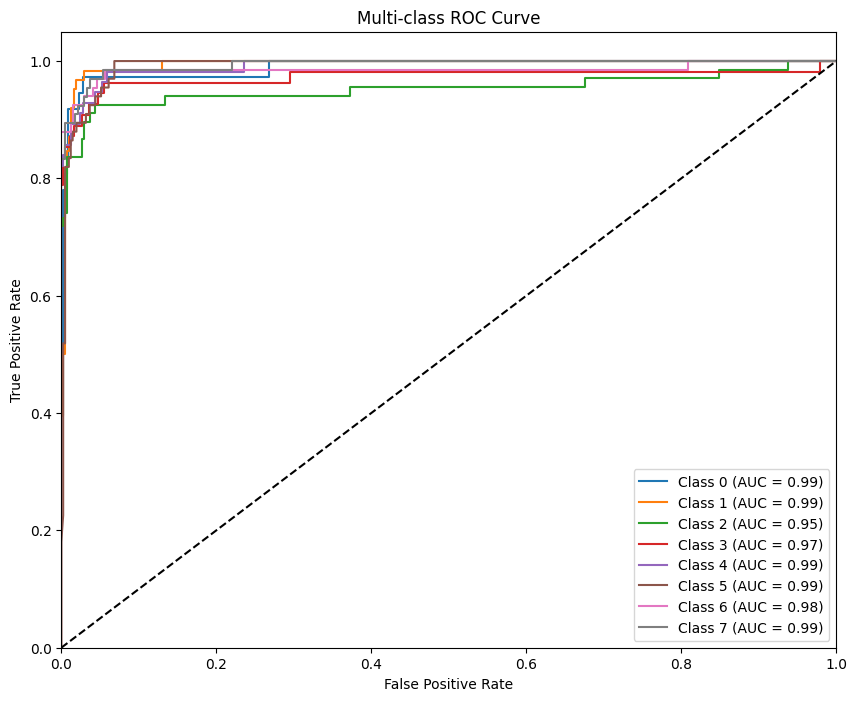

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# Assuming y_test has classes from 0 to 7 for 8 emotions, as per your labels.
# Binarize the output for multi-class ROC AUC calculation
y_test_bin = label_binarize(new_Ytest, classes=np.arange(8))
predictions_prob = model.predict(x_testcnn)

# Calculate AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], predictions_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(8):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.show()




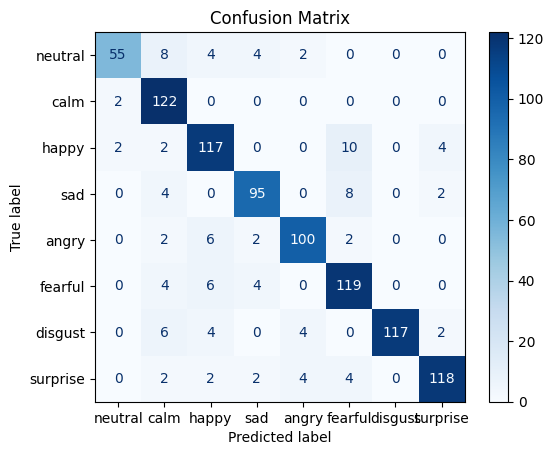

              precision    recall  f1-score   support

           0       0.93      0.75      0.83        73
           1       0.81      0.98      0.89       124
           2       0.84      0.87      0.85       135
           3       0.89      0.87      0.88       109
           4       0.91      0.89      0.90       112
           5       0.83      0.89      0.86       133
           6       1.00      0.88      0.94       133
           7       0.94      0.89      0.91       132

    accuracy                           0.89       951
   macro avg       0.89      0.88      0.88       951
weighted avg       0.89      0.89      0.89       951



In [20]:
# Confusion Matrix
conf_matrix = confusion_matrix(new_Ytest, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprise'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(new_Ytest, predictions))

In [18]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.75      0.83        73
           1       0.81      0.98      0.89       124
           2       0.84      0.87      0.85       135
           3       0.89      0.87      0.88       109
           4       0.91      0.89      0.90       112
           5       0.83      0.89      0.86       133
           6       1.00      0.88      0.94       133
           7       0.94      0.89      0.91       132

    accuracy                           0.89       951
   macro avg       0.89      0.88      0.88       951
weighted avg       0.89      0.89      0.89       951



In [84]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)

# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised

[[ 38  17   2   5   4   0   5   2]
 [  6 115   2   1   0   0   0   0]
 [  0   2 117   2   4   6   2   2]
 [  4  14   3  78   1   4   0   5]
 [  2   0   0   2 101   0   4   3]
 [  0   0   9   4   2 110   4   4]
 [  2   3   4   3   4   0 112   5]
 [  2   0   4   0   4   0   0 122]]


In [85]:
model.save('speech_model.h5')
print("MODEL SAVED")

MODEL SAVED


In [87]:
new_model=keras.models.load_model('speech_model.h5')
new_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)               │ (None, 40, 64)         │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 10, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 2, 256)         │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         4,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,674 (819.04 KB)

 Trainable params: 209,672 (819.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [88]:
loss, acc = new_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8410 - loss: 0.5429
Restored model, accuracy: 83.39%


MOBILEVNET2


In [47]:
x_traincnn.shape

(1929, 40, 1)

In [52]:
import pickle

# Save the entire model using Pickle
with open("speech_model_pickle.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as a Pickle file: model_pickle.pkl")

Model saved as a Pickle file: model_pickle.pkl


In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import MeanAbsoluteError
import numpy as np

# Load the model with custom objects
model = load_model("speech_model2.h5")

In [6]:
loss, acc = model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8817 - loss: 0.5442  
Restored model, accuracy: 88.12%
